In [56]:
import numpy as np
import math as m
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import poisson
from scipy.stats import norm

In [55]:
#Main program
background = np.loadtxt('background.txt', skiprows=2)
data = np.loadtxt('plate.txt', skiprows=2)

dt = 3                 # s

n_b = np.mean(background[:,1])
n_s = data[:,1] - n_b
u_s = np.sqrt(data[:,1] + n_b)

r = n_s/dt
u_r = u_s/dt
u_linear = np.abs(u_r/data[:,1])

mu_c = np.mean(n_s)
mu_r = np.mean(r)

t = (data[:,0] - 1) * dt

print(n_s)

[27.7 38.7 30.7 38.7 29.7 44.7 34.7 36.7 37.7 21.7 33.7 20.7 33.7 35.7
 38.7 33.7 29.7 34.7 35.7 39.7 32.7 33.7 50.7 35.7 37.7 33.7 22.7 33.7
 37.7 35.7 37.7 41.7 41.7 35.7 46.7 38.7 27.7 42.7 29.7 43.7 39.7 33.7
 28.7 49.7 30.7 34.7 37.7 29.7 30.7 28.7 30.7 41.7 37.7 36.7 27.7 30.7
 40.7 38.7 28.7 25.7]


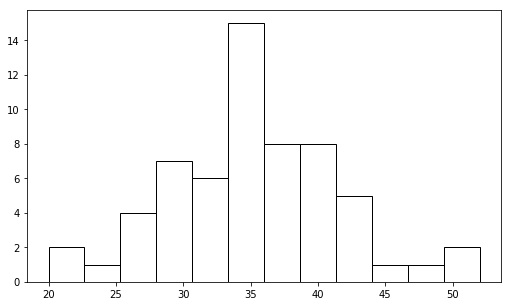

In [29]:
plt.figure(figsize=(8.5, 5))
bins_n = 12
range_n = (m.floor(min(n_s)), m.ceil(max(n_s))+1)
plt.hist(n_s, bins=bins_n, range=range_n, color='white', edgecolor='black', linewidth='1.0')
plt.show()

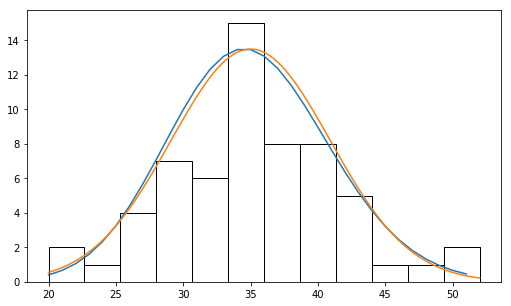

In [66]:
space_pn = range(range_n[0], range_n[1])
space_gn = np.linspace(range_n[0], range_n[1], num=1000)


plt.figure(figsize=(8.5, 5))
plt.hist(n_s, bins=bins_n, range=range_n, color='white', edgecolor='black', linewidth='1.0')
plt.plot(space_p, 200*poisson.pmf(space_p, mu=mu_c))
plt.plot(space_g, 200*norm.pdf(space_g, loc=mu_c, scale=m.sqrt(mu_c)))
plt.show()